## Store the data to HDF5 file for rapid analysis and calculation

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/hdf5_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``L-BP_cdna.dat`` 
    * ``L-BPS_cdna.dat``
    * ``L-BPH_cdna.dat``
    * ``HelAxis_cdna.dat``
    * ``MGroove_cdna.dat``
    * ``BackBoneCHiDihedrals_cdna.dat``
    
    These files **should be** present inside tutorial_data of the current/present working directory.
    
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


* Detailed documentation is provided [here](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html).

### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import dnaMD
%matplotlib inline


try:
    os.remove('cdna.h5')
except:
    pass


### Initializing DNA object with HDF5 file

* [DNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA) is initialized by using the total number of base-pairs


To store the data in HDF5 file, just initialize the class with the filename as shown below. Here, we named the HDF5 file as ``cdna.h5``.

**NOTE**: Except initialization, all other methods and functions can be used in similar ways.

In [2]:
# Initialization
dna = dnaMD.DNA(60, filename='cdna.h5')     #Initialization for 60 base-pairs DNA bound with the protein


### Store/Save data to HDF5 file

**No extra step neccessary to store the data in HDF5 file**. Just read the parameters from do_x3dna output files as described in previous tutorials.


* Local base-pair parameters as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/base_pairs_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).
* Local base-step parameters as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/base_steps_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).
* Local helical base-step parameters as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/helical_steps_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).
* Helical axis as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/helical_axis_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).
* Major and minor grooves as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/major_minor_groove_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).
* Backbone dihedrals as shown [preveiosly here](http://do-x3dna.readthedocs.io/en/latest/notebooks/backbone_torsion_wheel_tutorial.html#Initializing-DNA-object-and-storing-data-to-it).

In [3]:
# Read Local base-pair parameters
dna.set_base_pair_parameters('tutorial_data/L-BP_cdna.dat', bp=[1, 60], bp_range=True)

# Read Local base-step parameters
dna.set_base_step_parameters('tutorial_data/L-BPS_cdna.dat', bp_step=[1, 59], parameters='all', step_range=True)

# Read Local helical base-step parameters
dna.set_base_step_parameters('tutorial_data/L-BPH_cdna.dat', bp_step=[1, 59], parameters='all', step_range=True, helical=True)

# Read Helical axis
dna.set_helical_axis('tutorial_data/HelAxis_cdna.dat')

# Generate global axis by interpolation (smoothening)
dna.generate_smooth_axis(smooth=500, spline=3, fill_point=6)

# Calculate curvature and tangent along global helical axis
dna.calculate_curvature_tangent(store_tangent=True)

# Major and minor grooves 
parameters = [ 'minor groove', 'minor groove refined', 'major groove', 'major groove refined' ]
dna.set_major_minor_groove('tutorial_data/MGroove_cdna.dat', bp_step=[1, 59], parameters=parameters, step_range=True)

#Backbone dihedrals
dna.set_backbone_dihedrals('tutorial_data/BackBoneCHiDihedrals_cdna.dat', bp=[2, 59], parameters='all', bp_range=True)


Reading file : tutorial_data/L-BP_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BPS_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BPH_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/HelAxis_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001
|frame:       526| WARNING: Bending angle [-1-0-1] = 20.14 is more than cut-off angle 20;
                     Four maximum distances between three adjacent axis positions = (16.4, 14.4, 13.9, 13.5);
                     Deleting [np.int64(45), np.int64(46)] original helical axis positions to remove possible fitting artifact...
|frame:       549| WARNING: Bending angle [-1-0-1] = 27.93 is more than cut-off angle 20;
                     Four maximum distances between three adjacent axis positions = (21.0, 19.1, 15

/home/raj/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2635: RuntimeWarning: Mean of empty slice.
  xsmooth.append(xnew[start:end].mean())
/home/raj/github/do_x3dna/dnaMD/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/raj/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2636: RuntimeWarning: Mean of empty slice.
  ysmooth.append(ynew[start:end].mean())
/home/raj/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2637: RuntimeWarning: Mean of empty slice.
  zsmooth.append(znew[start:end].mean())


|frame:       636| WARNING: Bending angle [-1-0-1] = 33.38 is more than cut-off angle 20;
                     Four maximum distances between three adjacent axis positions = (14.9, 14.6, 14.2, 13.8);
                     Deleting [np.int64(5), np.int64(6)] original helical axis positions to remove possible fitting artifact...
|frame:       640| WARNING: Bending angle [-1-0-1] = 28.03 is more than cut-off angle 20;
                     Four maximum distances between three adjacent axis positions = (16.9, 14.0, 13.4, 13.4);
                     Deleting [np.int64(2), np.int64(3)] original helical axis positions to remove possible fitting artifact...
Fitting spline curve on helical axis of frame 1000 out of 1001 frames
Finished spline curve fitting...

Reading file : tutorial_data/MGroove_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/BackBoneCHiDihedrals_cdna.dat
Reading frame 1000
Finished reading.... Total number of fra

### Example to extract a parameter
As shown [previously here](http://do-x3dna.readthedocs.io/en/latest/notebooks/base_pairs_tutorial.html#Local-base-pair-parameter-of-a-base-pair-directly-from-dictionary), data can be extracted from HDF5 by same way as shown in the following.

Also, see that plot is similar.


Note that in this case, data is read from the HDF5 file, while in the previous tutorial, data was stored in memory (RAM).

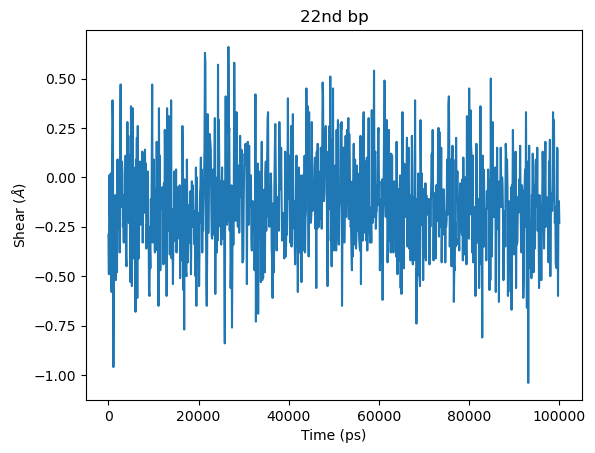

In [4]:
# Extracting "Shear" of 22nd bp
shear_20bp = dna.data['bp']['22']['shear'][:]

#Shear vs Time for 22nd bp
plt.title('22nd bp')
plt.plot(dna.time, shear_20bp)
plt.xlabel('Time (ps)')
plt.ylabel('Shear ($\AA$)')
plt.show()


### Example to extract parameter as a function of time

As shown [previously here](hhttp://do-x3dna.readthedocs.io/en/latest/notebooks/base_steps_tutorial.html#Local-base-step-parameters-as-a-function-of-time-(using-provided-functions)), smae method ([dnaMD.DNA.time_vs_parameter(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.time_vs_parameter)) can be used to get parameter values as a function of time.

Also, see that plot is similar.


Note that in this case, data is read from the HDF5 file, while in the previous tutorial, data was stored in memory (RAM).

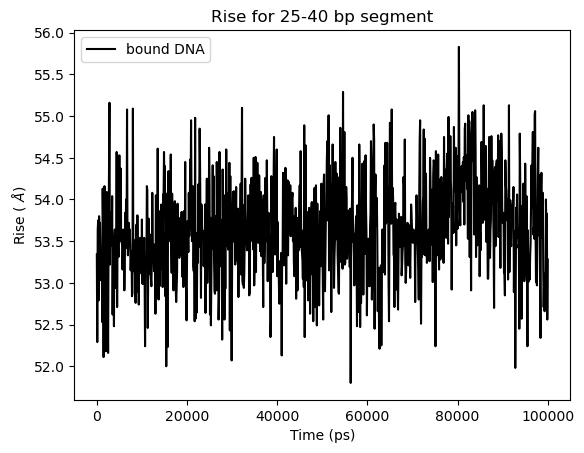

In [5]:
# Rise vs Time for 25-40 bp segment
plt.title('Rise for 25-40 bp segment')

# Rise is the distance between two base-pairs, so for a given segment it is sum over the base-steps
time, value = dna.time_vs_parameter('rise', [25, 40], merge=True, merge_method='sum')
plt.plot(time, value, label='bound DNA', c='k')

plt.xlabel('Time (ps)')
plt.ylabel('Rise ( $\AA$)')
plt.legend()
plt.show()

In [6]:
odna = dnaMD.DNA(60, filename='odna.h5')     #Initialization for 60 base-pairs DNA bound with the protein

# Read Local base-pair parameters
odna.set_base_pair_parameters('tutorial_data/L-BP_odna.dat', bp=[1, 60], bp_range=True)

# Read Local base-step parameters
odna.set_base_step_parameters('tutorial_data/L-BPS_odna.dat', bp_step=[1, 59], parameters='all', step_range=True)

# Read Local helical base-step parameters
odna.set_base_step_parameters('tutorial_data/L-BPH_odna.dat', bp_step=[1, 59], parameters='all', step_range=True, helical=True)

# Read Helical axis
odna.set_helical_axis('tutorial_data/HelAxis_odna.dat')

# Generate global axis by interpolation (smoothening)
odna.generate_smooth_axis(smooth=500, spline=3, fill_point=6)

# Calculate curvature and tangent along global helical axis
odna.calculate_curvature_tangent(store_tangent=True)

# Major and minor grooves 
parameters = [ 'minor groove', 'minor groove refined', 'major groove', 'major groove refined' ]
odna.set_major_minor_groove('tutorial_data/MGroove_odna.dat', bp_step=[1, 59], parameters=parameters, step_range=True)

#Backbone dihedrals
odna.set_backbone_dihedrals('tutorial_data/BackBoneCHiDihedrals_odna.dat', bp=[2, 59], parameters='all', bp_range=True)


Reading file : tutorial_data/L-BP_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BPS_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BPH_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/HelAxis_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001
Fitting spline curve on helical axis of frame 1000 out of 1001 frames
Finished spline curve fitting...

Reading file : tutorial_data/MGroove_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/BackBoneCHiDihedrals_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001
